In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_cbc_lsa.csv")

In [3]:
df_knn

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..CBC
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.175439
1,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.175439
2,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.175439
3,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.175439
4,4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.175439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.614035
74996,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.614035
74997,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.614035
74998,42976,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,0,0,...,1,1,1,1,1,1,1,1,1,0.614035


In [4]:
df_knn.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_knn.drop(['X..CBC', 'index'], axis = 1)
y = df_knn[['X..CBC']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.1754386 ],
       [0.1754386 ],
       [0.1754386 ],
       ...,
       [0.61403509],
       [0.61403509],
       [0.61403509]])

<AxesSubplot:ylabel='Count'>

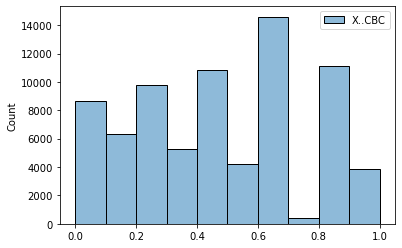

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_knreg)

0.09445955337839548

In [12]:
mean_squared_error(y_val, y_pred_knreg)

0.028918740135203343

In [13]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.17005510911232083

In [14]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.7749148837922545

In [15]:
#val
r2_score(y_val, y_pred_knreg)

0.6199622357403982

Residual plots for each target variable

Feature Selection

In [16]:
rfreg = RandomForestRegressor()

In [17]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [18]:
selector.estimator_.feature_importances_

array([1.11989835e-01, 1.10375588e-01, 1.12024143e-01, 1.18513205e-01,
       1.12396922e-01, 2.06269626e-02, 2.54452271e-03, 2.89145745e-02,
       9.27156789e-05, 2.07880655e-03, 5.59284293e-03, 1.16210714e-04,
       8.31361832e-03, 7.28839450e-05, 4.43154489e-03, 6.38992904e-03,
       8.25671838e-03, 9.37271537e-03, 1.63899293e-04, 9.80091089e-03,
       9.08743233e-05, 8.41803768e-05, 8.31282926e-03, 7.08302104e-03,
       9.99647809e-03, 2.26953035e-03, 8.86431701e-03, 6.69602314e-05,
       1.80606584e-04, 3.50596579e-03, 1.27089834e-02, 1.63056121e-04,
       7.53085933e-03, 0.00000000e+00, 7.76762102e-07, 7.57379488e-03,
       6.56695236e-03, 9.54926507e-03, 1.09975081e-03, 3.21980891e-04,
       1.79467082e-04, 9.99104201e-03, 2.34330146e-04, 1.31861345e-02,
       4.03223470e-03, 7.57916862e-03, 1.64894139e-03, 8.77658845e-04,
       5.49294379e-03, 9.93539281e-04, 4.60511587e-02, 1.00455482e-02,
       4.88751698e-03, 1.13255967e-03, 7.71498965e-03, 8.11447742e-03,
      

In [19]:
selector.threshold_

0.011627906976744186

In [20]:
mask = selector.get_support()

In [21]:
mask

array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False])

In [22]:
selected_features = X.columns[mask]

In [23]:
selected_X = df_knn[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,sativa,relaxed,blueberry,diesel,lemon,orange,vanilla
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,1,0,0,0,0,0
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,1,0,0,0,0,1
2,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,1,0,0,0,0,0
3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,1,0,0,0,0,0
4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.324915,0.131823,-0.099424,0.065491,0.038437,0,0,1,0,0,0,0,0
74996,0.324915,0.131823,-0.099424,0.065491,0.038437,0,0,1,0,0,0,0,0
74997,0.324915,0.131823,-0.099424,0.065491,0.038437,0,0,1,0,0,0,0,0
74998,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,0,1,1,1,1,1,1


In [24]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'sativa',
 'relaxed',
 'blueberry',
 'diesel',
 'lemon',
 'orange',
 'vanilla']

In [25]:
import joblib

joblib.dump(selected_X, "selected_X_knn_lsa_elbow_cbc.pkl")
joblib.dump(selector, "selector_knn_lsa_elbow_cbc.pkl")

['selector_knn_lsa_elbow_cbc.pkl']

Train test split (after Feature Selection)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [28]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [29]:
mean_absolute_error(y_val, y_pred_knreg)

0.09464697927803191

In [30]:
mean_squared_error(y_val, y_pred_knreg)

0.02855583160670357

In [31]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.16898470820374123

In [32]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.7814359253300366

In [33]:
#val
r2_score(y_val, y_pred_knreg)

0.6242956690130478

Hyperparameter Tuning

In [34]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [35]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [36]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 7}

kNN (after hyperparameter tuning)

In [54]:
knreg_ht = KNeighborsRegressor(n_neighbors = 7, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [55]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.04491318521365355

In [56]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.13124425506430404

In [57]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9749779284857093

In [58]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.7733728206018265

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [59]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [60]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow_cbc.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow_cbc.pkl")

['y_test_knreg_lsa_elbow_cbc.pkl']

In [61]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.04713570757728109

In [62]:
mean_squared_error(y_test, y_pred_knreg_test)

0.018005002275163693

In [63]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.13418271973381554

In [64]:
r2_score(y_test, y_pred_knreg_test)

0.7634090657513333

In [65]:
y_test

,X..CBC
11591,0.482456
52020,0.203509
34666,0.596491
22169,0.956140
23049,0.832749
...,...
60863,0.298246
32316,0.292398
60933,0.298246
43206,0.543860


In [66]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

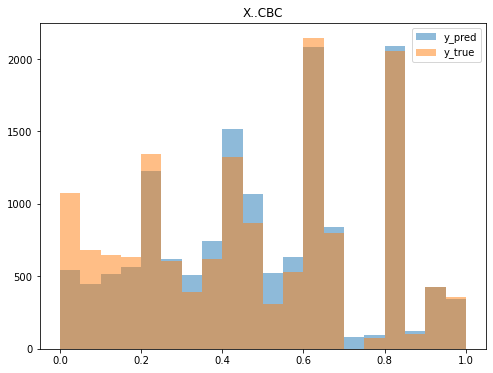

<Figure size 432x288 with 0 Axes>

In [67]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CBC"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_cbc.png')

Pearson R

In [68]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.882
P-value: 0.000


<AxesSubplot:>

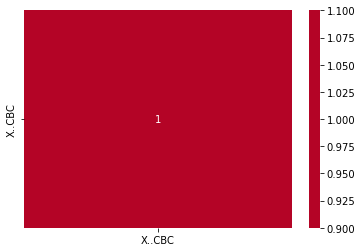

In [69]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)